In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/kaggle/input/test-file/titanic.csv")

pd.set_option('display.max_columns',None)
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [4]:
print(df.head(10))

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   
5          897         0       3   
6          898         1       3   
7          899         0       2   
8          900         1       3   
9          901         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
5                    Svensson, Mr. Johan Cervin    male  14.0      0      0   
6                          Connolly, Miss. Kate  f

In [5]:
print(df.tail(10))

     PassengerId  Survived  Pclass  \
408         1300         1       3   
409         1301         1       3   
410         1302         1       3   
411         1303         1       1   
412         1304         1       3   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                Name     Sex   Age  SibSp  \
408                  Riordan, Miss. Johanna Hannah""  female   NaN      0   
409                        Peacock, Miss. Treasteall  female   3.0      1   
410                           Naughton, Miss. Hannah  female   NaN      0   
411  Minahan, Mrs. William Edward (Lillian E Thorpe)  female  37.0      1   
412                   Henriksson, Miss. Jenny Lovisa  female  28.0      0   
413                               Spector, Mr. Woolf    male   NaN      0   
414                     Oliva y Ocana, Don

In [6]:

print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
print("\n",df.shape)
print("\n",df.duplicated().sum())
print("\n",df.isnull().sum())


 (418, 12)

 0

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
import matplotlib.pyplot as plt
import missingno as ms

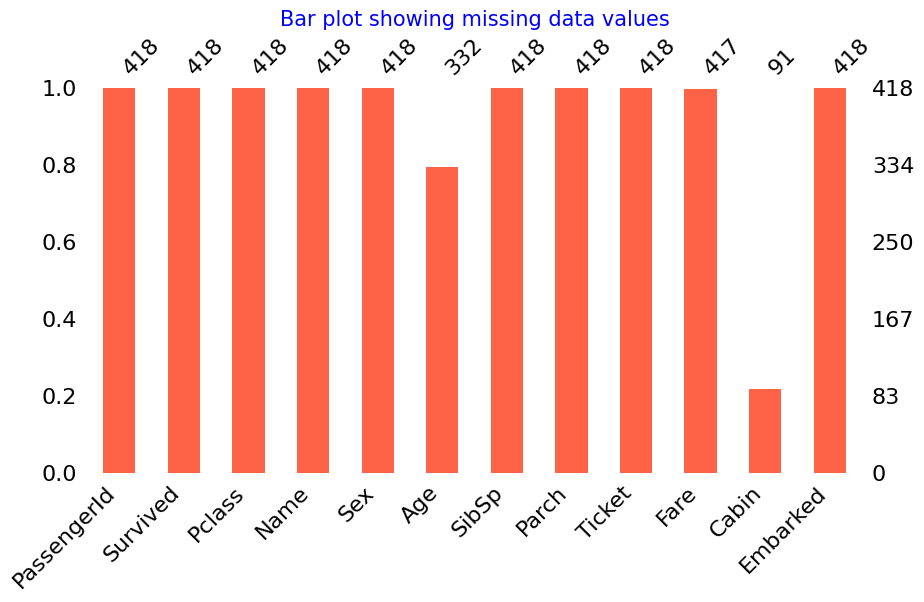

In [9]:
ms.bar(df,figsize=(10,5),color="tomato")
plt.title("Bar plot showing missing data values",size=15,c="b")
plt.show()

In [10]:
df.drop(['Cabin'],axis=1,inplace=True)
print(df.shape)


(418, 11)


In [11]:
print("\n",df["Embarked"].unique())
print("\n",df["Embarked"].value_counts())
df["Embarked"]=df["Embarked"].fillna('Q')
print("\n",df["Embarked"].value_counts())


 ['Q' 'S' 'C']

 Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

 Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


In [12]:
print("\n",df["Age"].value_counts())
print("\n",df["Age"].mean())
print("\n",df["Age"].median())
print("\n",df["Age"].mode().value_counts())
print("\n",df.describe().astype(int))


 Age
24.0    17
21.0    17
22.0    16
30.0    15
18.0    13
        ..
44.0     1
5.0      1
51.0     1
3.0      1
38.5     1
Name: count, Length: 79, dtype: int64

 30.272590361445783

 27.0

 Age
21.0    1
24.0    1
Name: count, dtype: int64

        PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare
count          418       418     418  332    418    418   417
mean          1100         0       2   30      0      0    35
std            120         0       0   14      0      0    55
min            892         0       1    0      0      0     0
25%            996         0       1   21      0      0     7
50%           1100         0       3   27      0      0    14
75%           1204         1       3   39      1      0    31
max           1309         1       3   76      8      9   512


In [13]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
print(df["Age"].isnull().sum())


0


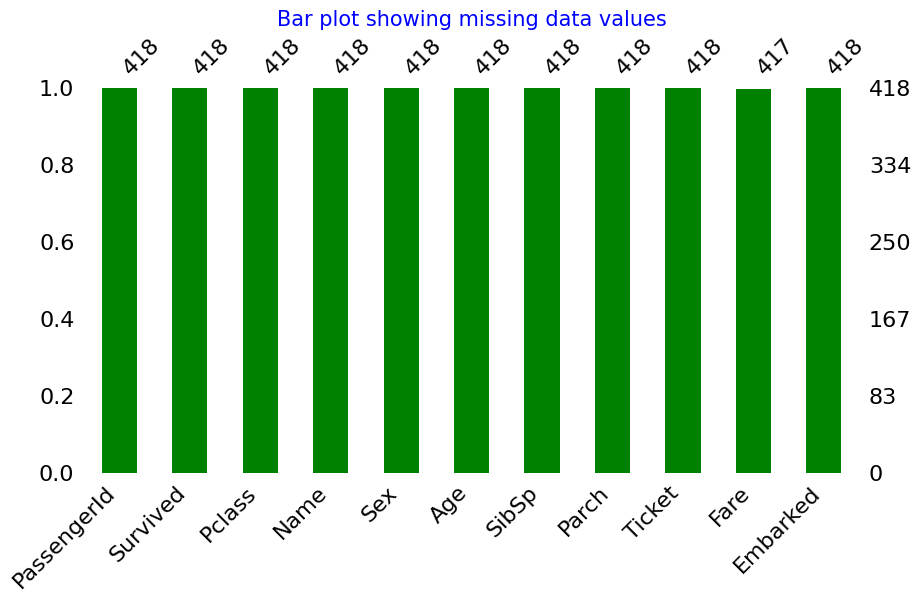

In [14]:
ms.bar(df,figsize=(10,5),color="green")
plt.title("Bar plot showing missing data values",size=15,c="b")
plt.show()

In [15]:
import seaborn as sns

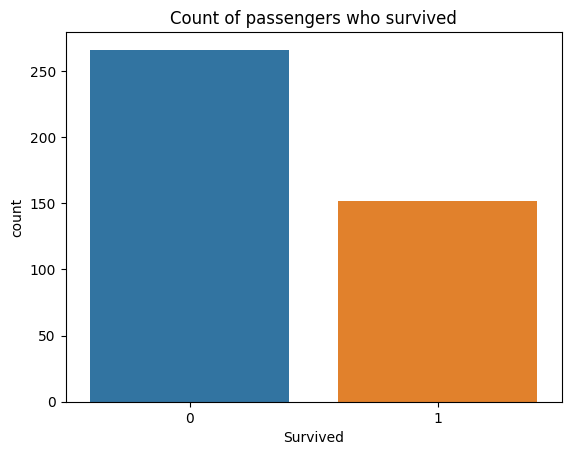

In [16]:
sns.countplot(x="Survived",data=df)
plt.title("Count of passengers who survived")
plt.show()

In [17]:
print(df["Sex"].value_counts())

Sex
male      266
female    152
Name: count, dtype: int64


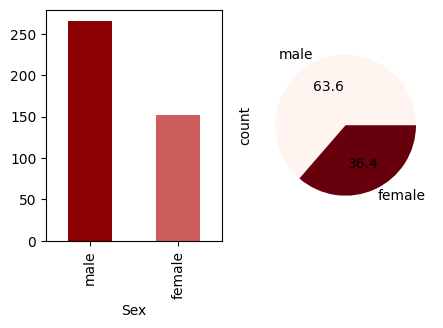

In [18]:
fig,axes=plt.subplots(1,2,figsize=(5,3))
df["Sex"].value_counts().plot(kind="bar",ax=axes[0],color=['DarkRed','indianred'])
df["Sex"].value_counts().plot(kind="pie",ax=axes[1],autopct='%0.1f',colormap="Reds")
plt.show()

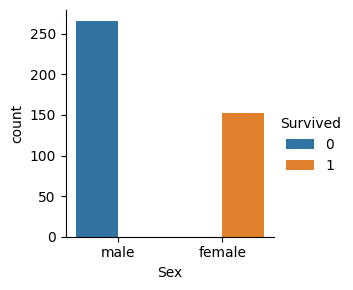

In [19]:
sns.catplot(x="Sex",hue="Survived",kind="count",data=df,height=3)
plt.show()

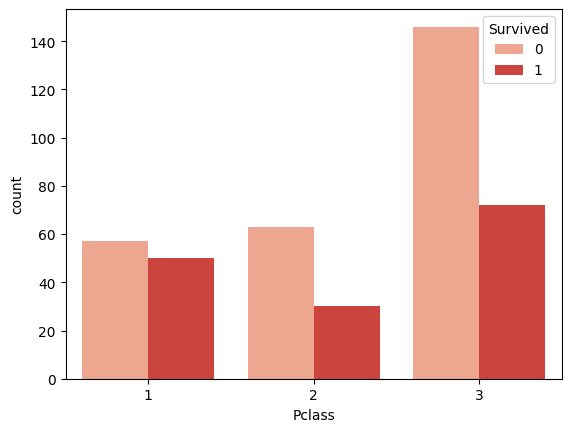

In [20]:
sns.countplot(x="Pclass",hue="Survived",data=df,palette="Reds")
plt.show()

In [21]:
df.drop(["Name","Ticket","PassengerId"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])
print(df.corr())

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.108615 -1.000000 -0.000011  0.099943  0.159120   
Pclass   -0.108615  1.000000  0.108615 -0.440782  0.001087  0.018721   
Sex      -1.000000  0.108615  1.000000  0.000011 -0.099943 -0.159120   
Age      -0.000011 -0.440782  0.000011  1.000000 -0.079535 -0.045073   
SibSp     0.099943  0.001087 -0.099943 -0.079535  1.000000  0.306895   
Parch     0.159120  0.018721 -0.159120 -0.045073  0.306895  1.000000   
Fare      0.191514 -0.577147 -0.191514  0.329071  0.171539  0.230046   
Embarked -0.076281  0.227983  0.076281 -0.157996  0.052708  0.054577   

              Fare  Embarked  
Survived  0.191514 -0.076281  
Pclass   -0.577147  0.227983  
Sex      -0.191514  0.076281  
Age       0.329071 -0.157996  
SibSp     0.171539  0.052708  
Parch     0.230046  0.054577  
Fare      1.000000 -0.257183  
Embarked -0.257183  1.000000  


In [25]:
df["Age"]=df["Age"].replace(np.nan,0)
df["Embarked"]=df["Embarked"].replace(np.nan,0)
print(df)

     Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0           0       3    1  34.50000      0      0    7.8292         1
1           1       3    0  47.00000      1      0    7.0000         2
2           0       2    1  62.00000      0      0    9.6875         1
3           0       3    1  27.00000      0      0    8.6625         2
4           1       3    0  22.00000      1      1   12.2875         2
..        ...     ...  ...       ...    ...    ...       ...       ...
413         0       3    1  30.27259      0      0    8.0500         2
414         1       1    0  39.00000      0      0  108.9000         0
415         0       3    1  38.50000      0      0    7.2500         2
416         0       3    1  30.27259      0      0    8.0500         2
417         0       3    1  30.27259      1      1   22.3583         0

[418 rows x 8 columns]


In [27]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]
print("XXXX",x)
print("YYYY",y)

XXXX      Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         1
1         3    0  47.00000      1      0    7.0000         2
2         2    1  62.00000      0      0    9.6875         1
3         3    1  27.00000      0      0    8.6625         2
4         3    0  22.00000      1      1   12.2875         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         2
414       1    0  39.00000      0      0  108.9000         0
415       3    1  38.50000      0      0    7.2500         2
416       3    1  30.27259      0      0    8.0500         2
417       3    1  30.27259      1      1   22.3583         0

[418 rows x 7 columns]
YYYY 0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [28]:
#splitting dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

print("DF",df.shape)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_test.shape)
print("y_test",y_test.shape)

DF (418, 8)
x_train (334, 7)
x_test (84, 7)
y_train (84,)
y_test (84,)


In [42]:
#Handling Missing Values
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]
print(x_train.isnull().sum())  
print(y_train.isnull().sum())  

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
0


In [43]:
#model naive bayes
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [44]:
y_pred=NB.predict(x_test)
print("y_pred",y_pred)
print('y_test',y_test)

y_pred [0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 0 0 1 0 0 1 1 0 0]
y_test 289    0
258    1
392    0
6      1
296    1
      ..
137    0
350    1
283    1
325    0
357    0
Name: Survived, Length: 84, dtype: int64


In [56]:
from sklearn.metrics import accuracy_score
print("ACCURACY",accuracy_score(y_test,y_pred)*100,"%")

ACCURACY 100.0 %


In [59]:
#testing
testPrediction=NB.predict([[0,3,1,22.0,1,6,2]])
if testPrediction==1:
    print("Survived")
else:
    print("Dead💀")

Dead💀
